# Interactive Attacker Activity

Using log data from a Cowrie honeypot stored in an SQLite database, we can plot the attackers on a map. 

_Harmless one-off attacks are labelled green. Suspicious attacks are marked orange. Very suspicious attacks are orange **and** with a trace line. Potential advanced persistent threats or botnets are marked red with a trace line._ 

In [383]:
import log_digester as ld
import random
import pandas as pd
import folium
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

conn = ld.connect_db('db.sqlite')
data = pd.read_sql_query("SELECT * from attackers LIMIT 150",conn)

m = folium.Map(location=[50, -25], zoom_start=3)

for index, element in data.iterrows():
    src_ip = element['src_ip']
    continent_code = element['continent_code']
    lat = element['latitude'] + random.uniform(0.01,0.05)
    lon = element['longitude'] + random.uniform(0.01,0.05)
    country_name = element['country_name']
    subdivision_name = element['subdivision_name']
    city_name = element['city_name']
    radius = element['accuracy_radius']
    attack_count = element['attack_count']
    
    if element['country_name'] is not None:
        country_name = element['country_name']
    else:
        country_name = "Unknown country"
        
    if element['isp_name'] is not None:
        isp_name = element['isp_name']
    else:
        isp_name = "No ISP"
    
    if element['city_name'] is not None:
        city_name = element['city_name']
    else:
        city_name = "Unknown city"
    
    if element['subdivision_name'] is not None:
        subdivision_name = element['subdivision_name']
    else:
        subdivision_name = "Unknown region"

    # Don't show attacks made from the same city as the Honeypot (aka, me logging in to test things)
    if city_name != "Toronto":
        
        attacker = [lat,lon]
        sensor = [43.6532, -79.3832]
        
        if attack_count >= 500:
            color = 'red'
            folium.PolyLine(locations=[attacker, sensor], color=color).add_to(m)
        elif 3 <= attack_count < 500:
            color = 'orange'
            folium.PolyLine(locations=[attacker, sensor], color=color).add_to(m)
        elif 0 <= attack_count < 3:
            color = 'green'
            
        popup_tag = '<i>' +city_name+', '+subdivision_name+', '+ '</i><b>'+ country_name+'<br><br></b>Accuracy: '+str(radius)+'km <br>' + 'Attacks: ' + str(attack_count) +'<br><br>'+ str(isp_name) + '<b><br>' + str(src_ip) + '</b></i>'
        folium.Marker(
            location=attacker, 
            popup=popup_tag,
            icon=folium.Icon(color=color, icon='cloud')
        ).add_to(m)
        
        
# Draw our honeypot last so it is drawn on top
folium.Marker(
    location=[43.6532,-79.3832],
    popup='Sensor',
    icon=folium.Icon(color='blue', icon='cloud')
).add_to(m)

m

## Attacks by IP Address

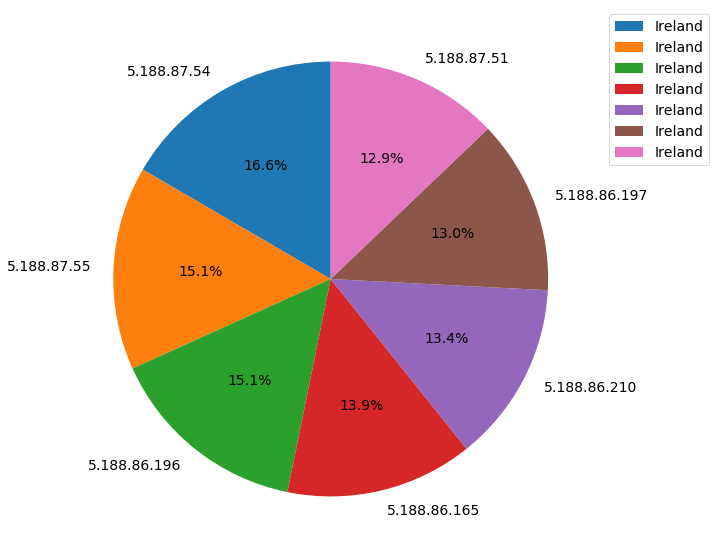

In [381]:
data = pd.read_sql_query("SELECT * from attackers", conn)
data = data.sort_values(['attack_count'],ascending=False)
data.groupby(['country_name','attack_count'])
data = data[0:7]

plt.figure(figsize=(10,10))
ax1 = plt.subplot()

data.plot(kind='pie', y = 'attack_count', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, labels=data['src_ip'], legend = False, fontsize=14)

#ax1.legend(loc=9, labels=data['country_name'])
plt.legend(bbox_to_anchor=(1,1), prop={'size': 14}, labels=data['country_name'])

ax2 = plt.subplot()
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

plt.axis('off')
plt.show()

## Attacks by Country

Here is some markdown, blah blah blah

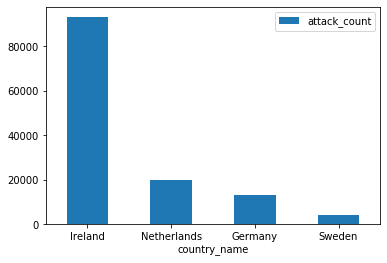

In [380]:
from IPython.display import display

data = pd.read_sql_query("SELECT * FROM countries ORDER BY attack_count DESC LIMIT 4", conn)
data = data.sort_values(by='attack_count',ascending=False)
#colors = ["#bcd4de", "#7c98b3", "#adcad6", "#848c8e", "#afbed1"]

ax = data.plot.bar(x='country_name', y='attack_count', rot=0)
plt.show()


# Attacker Hotspots (Big Players)

In [301]:
# import the library
import folium
import pandas as pd
import pgeocode

world_geo = json.load(open("data/world-countries.json"))       
data = pd.read_sql_query("SELECT * FROM cities ORDER BY attack_count" , conn)[['attack_count', 'latitude','longitude']]

# Make an empty map
m = folium.Map(location=[20,0], zoom_start=2)
 
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']],
      #popup=data.iloc[i]['name'],
      radius=data.iloc[i]['attack_count']*25,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
 
m

# Attacker Hotspots (Everyone else...)

In [365]:
# import the library
import folium
import pandas as pd
import pgeocode

world_geo = json.load(open("data/world-countries.json"))       
data = pd.read_sql_query("SELECT * FROM cities ORDER BY attack_count LIMIT 150" , conn)[['attack_count', 'latitude','longitude']]

# Make an empty map
m = folium.Map(location=[20,0], zoom_start=2)
 
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']],
      #popup=data.iloc[i]['name'],
      radius=data.iloc[i]['attack_count']*100000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
 
m

Because the volume of attacks coming out of Ireland and the Netherlands are _so large_, it throws off the scale for the rest of the data. Here's the activity excluding them.

# Attacker Hotspots (Asia)

In [339]:
# import the library
import folium
import pandas as pd
import pgeocode

world_geo = json.load(open("data/world-countries.json"))       
data = pd.read_sql_query("SELECT * FROM attackers WHERE continent_code='Asia'" , conn)[['attack_count', 'latitude','longitude']]

# Make an empty map
m = folium.Map(location=[30,110], zoom_start=4)
 
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']],
      #popup=data.iloc[i]['name'],
      radius=data.iloc[i]['attack_count']*5000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
 
m


In [338]:
data = pd.read_sql_query("SELECT * FROM attackers WHERE continent_code='Asia'" , conn)[['src_ip','isp_name','country_name','city_name','attack_count']]
data.head()

,src_ip,isp_name,country_name,city_name,attack_count
0,68.183.236.29,"DigitalOcean, LLC",Singapore,Singapore,254
1,45.40.198.41,Shenzhen Tencent Computer Systems Company Limited,China,None,231
2,101.109.83.140,TOT Public Company Limited,Thailand,None,138
3,121.162.131.223,Korea Telecom,South Korea,Seoul,128
4,210.68.200.202,Digital United Inc.,Taiwan,None,101


# Attacker Hotspots (North America)

In [362]:
# import the library
import folium
import pandas as pd
import pgeocode

world_geo = json.load(open("data/world-countries.json"))       
data = pd.read_sql_query("SELECT * FROM attackers WHERE continent_code='North America' ORDER BY attack_count" , conn)[['attack_count', 'latitude','longitude']]

# Make an empty map
m = folium.Map(location=[35,-90], zoom_start=4)
 
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']],
      #popup=data.iloc[i]['name'],
      radius=data.iloc[i]['attack_count']*2500,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
 
m

In [364]:
data = pd.read_sql_query("SELECT * FROM attackers WHERE continent_code='North America'" , conn)[['src_ip','isp_name','country_name','city_name','attack_count']]
data.head()

,src_ip,isp_name,country_name,city_name,attack_count
0,178.128.68.110,"DigitalOcean, LLC",United States,Santa Clara,488
1,206.189.73.71,"DigitalOcean, LLC",United States,Santa Clara,314
2,141.98.81.138,Hostkey B.v.,Panama,None,285
3,141.98.81.150,Hostkey B.v.,Panama,None,281
4,198.199.113.209,"DigitalOcean, LLC",United States,San Francisco,154


In [36]:
# Some sample code brainstorming out how we'll retrieve data based on timeframe

from datetime import datetime, timedelta
import dateutil.parser

iso = "2019-07-09T10:01:53.342265Z"
timestamp = dateutil.parser.parse(iso)
print("Received:")
print(timestamp.date())

print("Retrieve records since last month, timestamp containing:")
last_month = timestamp - timedelta(days=30)
print(last_month.date())

# SELECT * from attack_log where timestamps CONTAINS ...

time = str(timestamp).split()[1].split(".")[0]
hour, minute = time.split(":")[0:2]

# Get timezone from attack log entry, convert it from UTC, append as local_timestamp?
# The timestamp in the attackers timezone is useful information, aka are they 9am-5pm? 

# Attacks based on day of the week:
#datetime.isoweekday(timestamp)
#datetime.isocalendar(timestamp)



Received:
2019-07-09
Retrieve records since last month, timestamp containing:
2019-06-09
